<a id='table_content'></a>
## Table of Contents

* [Problem Statements & Scope](#problem_statement)
* [Extract Data](#extract_data)
    - [Scraping the local brands](#scraping_brand)
    - [Scraping the local skincare products](#scraping_product)
    - [Scraping the product reviews](#scraping_review)
        - [Continue scraping the product reviews (2)](#cont_review)
    - [Scraping user demographics](#scraping_user)
* [Transform Data](#transform_data)
    - [Cleaning Product Dataset](#cleaning_product)
    - [Cleaning Review Dataset](#cleaning_review)
    - [Cleaning User Dataset](#cleaning_user)
    - [Anonymize Usernames](#anonymize)
    - [Foreign Keys](#foreign_keys)

<a id='problem_statement'></a>
## Problem Statements & Scope

 Problem Statement: Make dataset for ML project(s) end-to-end.

This notebook only covers the scraping and transforming of the base dataset. Each project goal will be having other data preprocessing relevant to its problem statement. The dataset is only for educational purposes, so I anonymized the user name feature and dropped the user link feature in the User Dataset. However, there's no private information in the dataset as the user profile was public and can be seen on the original site. Despite the anonymization, there's still be a snippet of some of the true user names and links in this notebook. 

#### import required modules

In [2]:
#scraping
from urllib.request import urlopen as ureq
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from dateutil import parser
import datetime
import time

# timeout issues
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
chrome_options.page_load_strategy = 'normal'
chrome_options.add_argument('--enable-automation')
chrome_options.add_argument('disable-infobars')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--ignore-certificate-errors')
chrome_options.add_argument('--allow-insecure-localhost')
chrome_options.add_argument('--allow-running-insecure-content')
chrome_options.add_argument('--disable-notifications')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--disable-browser-side-navigation')
chrome_options.add_argument('--headless')

driver = webdriver.Chrome(ChromeDriverManager().install())

#dataframes
import pandas as pd
import numpy as np
import re

#anonymize usernames
import csv
from faker import Factory
from collections import defaultdict

[WDM] - Current google-chrome version is 94.0.4606
[WDM] - Get LATEST driver version for 94.0.4606


[WDM] - There is no [win32] chromedriver for browser 94.0.4606 in cache
[WDM] - Get LATEST driver version for 94.0.4606
[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/94.0.4606.61/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\hwulanayu\.wdm\drivers\chromedriver\win32\94.0.4606.61]


In [ ]:
pd.set_option('display.max_columns', None)

<a id='extract_data'></a>
## Extract Data

<a id='scraping_brand'></a>
### Scraping the local brands

In [12]:
PATH = r"C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)

brand_url ='https://reviews.femaledaily.com/brands'
#opening up connection, grabbing the page with selenium webdriver
driver.get(brand_url)

In [4]:
#Indonesian brands
brand_idn = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//*[@id='id_tab_Indonesia']")))
driver.execute_script("arguments[0].click();", brand_idn)

#brands alphabet
brand_list = brand_idn.find_element_by_xpath("//div[@class='jsx-2959408550 brand-alphabet-list']")
brand_char = brand_list.find_elements_by_tag_name('a')

In [5]:
list_brand_lokal = []
sum_prod_lokal =[]
list_link = []

# list of local beauty brands
for char in brand_char:
	driver.execute_script("arguments[0].click();", char)
	brand_list_prod = char.find_element_by_xpath("//div[@class='jsx-2959408550 brand-list-prod']")
	brand_prod = brand_list_prod.find_elements_by_tag_name('a')
	for name in brand_prod:
		brand_name = name.find_elements_by_tag_name('h2')
		sum_prod = name.find_elements_by_tag_name('p')
		list_link.append(name.get_attribute('href'))
		for only_name in brand_name:
			list_brand_lokal.append(only_name.text)
		for only_sum in sum_prod:
			sum_prod_lokal.append(only_sum.text)

In [6]:
len(list_brand_lokal)

945

In [7]:
zip_iterator = zip(list_brand_lokal, list_link)
brand_dict = dict(zip_iterator)
dict_skincare_lokal = {}
link_product = []

In [8]:
#get list of local skincare brand & products href
for key, value in brand_dict.items():
	driver.get(value)
	try:
		skincare_filter = driver.find_element_by_xpath("//*[contains(text(), 'SkinCare')]")
		driver.execute_script("arguments[0].click();", skincare_filter)
		element_exist = WebDriverWait(driver, 5).until(EC.presence_of_all_elements_located((By.XPATH, "//div[@class='jsx-4252524774 brand-product']")))
		if element_exist:
			dict_skincare_lokal[key] = value
			brand_product = WebDriverWait(driver, 5).until(EC.presence_of_all_elements_located((By.XPATH, "//a[@class='jsx-2059197805']")))
			for product in brand_product:
				link_product.append(product.get_attribute('href'))
	except:
		print("merk " + key + " tidak punya produk skincare")

merk Absolute tidak punya produk skincare
merk Aelin Skincare tidak punya produk skincare
merk Aeris Beaute tidak punya produk skincare
merk Aeuko tidak punya produk skincare
merk Aile Glow tidak punya produk skincare
merk Akiko Beauty tidak punya produk skincare
merk Alatté tidak punya produk skincare
merk Aldo Akira tidak punya produk skincare
merk Alien Objects tidak punya produk skincare
merk Allglows tidak punya produk skincare
merk Alurin Beauty tidak punya produk skincare
merk Amara tidak punya produk skincare
merk Amora tidak punya produk skincare
merk Anava'S Secret tidak punya produk skincare
merk Andalan Feminine Care tidak punya produk skincare
merk Anggie Rassly Beauty tidak punya produk skincare
merk Annata Parfumah tidak punya produk skincare
merk Anoraskin tidak punya produk skincare
merk ARRA Beauty tidak punya produk skincare
merk Artemy Beauty tidak punya produk skincare
merk Artisan Professionel tidak punya produk skincare
merk Aurelloly tidak punya produk skincare


merk Kedip Lash tidak punya produk skincare
merk Khami tidak punya produk skincare
merk Kilda Beauty tidak punya produk skincare
merk Kiloalta tidak punya produk skincare
merk Kind Cosmetics tidak punya produk skincare
merk Kirei Jabez tidak punya produk skincare
merk Klen & Kind tidak punya produk skincare
merk Klinskin tidak punya produk skincare
merk Korea Glow tidak punya produk skincare
merk KOU Bali tidak punya produk skincare
merk Kriwil tidak punya produk skincare
merk La Perle tidak punya produk skincare
merk La Rose Rouge tidak punya produk skincare
merk Lamica tidak punya produk skincare
merk Lashtic tidak punya produk skincare
merk Lavie Lash tidak punya produk skincare
merk LAYN Cosmetics tidak punya produk skincare
merk Lifebuoy tidak punya produk skincare
merk Lindor Cosmetics tidak punya produk skincare
merk Lip On Lip tidak punya produk skincare
merk Lipghost Beauty tidak punya produk skincare
merk Lisselash tidak punya produk skincare
merk Lola Lashes tidak punya prod

merk X-Pert tidak punya produk skincare
merk XL Professionnel tidak punya produk skincare
merk Yesta tidak punya produk skincare
merk ZBR Skincare tidak punya produk skincare
merk Zeesop tidak punya produk skincare
merk Zen tidak punya produk skincare
merk Zinc tidak punya produk skincare


In [17]:
print(len(dict_skincare_lokal))
print(len(link_product))

562
3786


<a id='scraping_product'></a>
### Scraping the local skincare products

In [25]:
subcategory = []
product_brand = []
product_name = []
product_variant = []
product_price =[]
product_desc = []
product_link = []

#get information for each product
for link in link_product:
	driver.get(link)
	driver.implicitly_wait(3) #wait 3 seconds

	try:
		breadcrumb_sub = driver.find_elements_by_xpath("//a[@class='jsx-1858436673 breadcrumb-section-text']")
		get_product_brand = driver.find_element_by_xpath("//h2[@class='jsx-905139883 jsx-1996910461 product-brand']")
		get_product_name = driver.find_element_by_xpath("//h1[@class='jsx-905139883 jsx-1996910461 product-name']")
        
		get_desc_toggle = driver.find_element_by_xpath('//span[@class="jsx-905139883 jsx-1996910461 toggle-desc expanded"]')
		driver.execute_script("arguments[0].click();", get_desc_toggle)
		get_product_desc = driver.find_element_by_xpath("//p[@class='jsx-905139883 jsx-1996910461 product-desc']")
   
		#get product price
		try:
			get_product_price = WebDriverWait(driver, 3).until(EC.presence_of_all_elements_located((By.XPATH, "//p[@class='jsx-905139883 jsx-1996910461 product-price']")))
			if get_product_price:
				product_price.append(get_product_price[0].text)
			else:
				product_price.append('')
		except:
			product_price.append('beauty studio')
                
		#get product variant
		get_product_variant = WebDriverWait(driver, 3).until(EC.presence_of_all_elements_located((By.XPATH, '//h3[@class="jsx-905139883 jsx-1996910461 product-shade"]')))
		if get_product_variant:
			product_variant.append(get_product_variant[0].text)
		else:
			product_variant.append('')
	        
		#append the information to lists
		subcategory.append(breadcrumb_sub[1].text)
		product_brand.append(get_product_brand.text)
		product_name.append(get_product_name.text)
		product_desc.append(get_product_desc.text)
		product_link.append(link)
	except:
		print('something not found')

something not found
something not found
something not found
something not found
something not found


- The use of try-except can be changed in more detail for each element searched for on-page. The try-except in the for-loop code above only to make sure the list length for each element is the same.

- If there's no particular element, append missing value placeholder such as None or np.nan or np.null, according to the element's type being searched for in the except section. Rather than an empty string, append None/NaN value is faster in capturing the missing value when data cleaning.

-  Better make a separate function for each task.

In [26]:
print(len(subcategory))
print(len(product_brand))
print(len(product_name))
print(len(product_price))
print(len(product_desc))
print(len(product_variant))

3781
3781
3781
3781
3781
3781


In [28]:
product_df = pd.DataFrame(list(zip(subcategory, product_brand, product_name, product_variant, product_price, product_desc, product_link)), 
                  columns= ['subcategory', 'brand', 'product_name', 'variant', 'price', 'description', 'link'])

In [29]:
product_df.to_csv("Indonesian Skincare Products_August 2021.csv", index=False, header=True)

<a id='scraping_review'></a>
### Scraping the product reviews

In [9]:
product_df = pd.read_csv('Indonesian Skincare Products_August 2021.csv')
product_df.head(5)

,subcategory,brand,product_name,variant,price,description,link
0,Night Cream,Abstract Beauty,"Laili Supra Face Cream, Bidara Series, Laili B...",pelembab,Rp. 45.000,merupakan krim pelembab dari Laily Beauty Bida...,https://reviews.femaledaily.com/products/moist...
1,Sun Protection,Acanthe,Sunscreen Cream SPF 40,NaN,Rp. 150.000,Acanthe Sunscreen Cream SPF 40 merupakan sunsc...,https://reviews.femaledaily.com/products/moist...
2,Serum & Essence,Acanthe,Triple C Serum,NaN,Rp. 1.250.000,Achante Triple C adalah produk dermatologi yan...,https://reviews.femaledaily.com/products/treat...
3,Serum & Essence,Aceskin,Ace Face Bright and Glow Serum,NaN,Rp. 189.000,Aceskin Ace Face Bright and Glow Serum merupak...,https://reviews.femaledaily.com/products/treat...
4,Serum & Essence,Aceskin,Ace Face Age Defying Serum,NaN,Rp. 189.000,Aceskin Ace Face Age Defying Serum merupakan A...,https://reviews.femaledaily.com/products/treat...


In [ ]:
user_name = []
user_link = []
star_rating = []
is_recommend = []
review_date = []
user_review = []
purchase_point = []
review_link = []
product_brand = []
product_name = []
date_now = []

for link, brand, product in zip(product_df.link, product_df.brand, product_df.product_name):    
    for page in range(1,200):
        try:
            link_per_page = link[:-1] + str(page)
            driver.get(link_per_page)
            driver.implicitly_wait(3) 
            is_review_container = driver.find_element_by_xpath('//div[@class="jsx-905139883 jsx-1996910461 list-reviews"]')
            review_list = driver.find_elements_by_class_name('jsx-905139883.item')
            for item in review_list:
                get_username = item.find_element_by_xpath('.//p[@class="profile-username"]')
                get_user_link = item.find_element_by_xpath(".//a[contains(@href,'//reviews.femaledaily.com/user/')]")

                star_list = item.find_element_by_xpath('.//span[@class="cardrv-starlist"]')
                get_star_full = star_list.find_elements_by_xpath('.//i[contains(@class,"icon-ic_big_star_full")]')
                get_star_half = star_list.find_elements_by_xpath('.//i[contains(@class,"icon-ic_big_star_half")]')
                count_stars = len(get_star_full) + 0.5*(len(get_star_half))
                    
                get_recommendation_up = item.find_elements_by_xpath('.//i[@class="icon-ic_thumbs_up"]')
                if get_recommendation_up:
                    recommend = 'Yes'
                else:
                    get_recommendation_down = item.find_elements_by_xpath('.//i[@class="icon-ic_thumbs_down"]')
                    if get_recommendation_down:
                        recommend = 'No'
                    else:
                        recommend = ''
                
                get_review_text = item.find_element_by_xpath('.//p[@class="text-content"]')
                
                get_review_date = item.find_element_by_xpath('.//p[@class="review-date"]')
                
                get_purchase_point = item.find_elements_by_xpath('.//div[@class="information-wrapper"]/p/b')
                if get_purchase_point:
                    purchase_at = get_purchase_point[1].text
                else:
                    purchase_at = ''

                #append the information to lists
                user_name.append(get_username.text)
                user_link.append(get_user_link.get_attribute('href'))
                star_rating.append(count_stars)
                is_recommend.append(recommend)
                user_review.append(get_review_text.text)
                review_date.append(get_review_date.get_attribute("innerHTML"))
                purchase_point.append(purchase_at)
                date_now.append(datetime.datetime.now())
                review_link.append(link_per_page)
                product_brand.append(brand)
                product_name.append(product)

        except:
            break

- Try a shorter loop. 200-page reviews of each product will take a long time. When the internet is unstable and the looping stops, look at the last row from the end of the scraped dataframe. Equate with the last product list index. Continue looping with the last index.

- Same as the previous code, try to replace the addition of empty string with Null or NaN or None value and try-catch each element.

- Create a function or if-else to retrieve the review date by converting the date, month, and year with the [dateparser](https://dateparser.readthedocs.io/en/latest/) module. Dateparser can handle dates presented in the form of 'x minutes/hours/days/months/years ago.'

In [ ]:
print(len(user_name))
print(len(user_link))
print(len(star_rating))
print(len(is_recommend))
print(len(review_date))
print(len(user_review))
print(len(purchase_point))
print(len(review_link))
print(len(product_brand))
print(len(product_name))
print(len(date_now))

In [ ]:
review_df = pd.DataFrame(list(zip(user_name, user_link, star_rating, is_recommend, review_date, user_review, purchase_point, review_link,
                                 product_brand, product_name, date_now)), 
                  columns= ['user_name', 'user_link', 'star_rating', 'is_recommend', 'review_date', 'user_review', 'purchase_point', 'review_link',
                                 'product_brand', 'product_name', 'date_now'])

In [ ]:
review_df.to_csv("Indonesian Skincare Review Female Daily_August 2021.csv", index=False, header=True)

In [ ]:
review_df.to_pickle("Indonesian Skincare Review Female Daily_August 2021.pkl")

<a id='cont_review'></a>
### Continue scraping the product reviews (2)

In [46]:
review_df = pd.read_pickle('Indonesian Skincare Review Female Daily_August 2021.pkl')
review_df.tail(5)

,user_name,user_link,star_rating,is_recommend,review_date,user_review,purchase_point,review_link,product_brand,product_name,date_now
86408,resthirismarinip,https://reviews.femaledaily.com/user/resthiris...,5.0,Yes,11 Mar 2020,Suka sama penemuan sunscreen yg ga usa dicolek...,Shopee,https://reviews.femaledaily.com/products/moist...,Jarte Beauty,Sunscreen Spray x Nathanie Christy,2021-09-04 09:39:14.437286
86409,naomitece,https://reviews.femaledaily.com/user/naomitece,4.0,Yes,05 Mar 2020,"Finally... a local, cruelty-free, reef-friendl...",Shopee,https://reviews.femaledaily.com/products/moist...,Jarte Beauty,Sunscreen Spray x Nathanie Christy,2021-09-04 09:39:17.635173
86410,Adinevkh,https://reviews.femaledaily.com/user/Adinevkh,5.0,Yes,25 Feb 2020,Sesuka itu sama produk iniiiii. aku tuh tipe k...,Shopee,https://reviews.femaledaily.com/products/moist...,Jarte Beauty,Sunscreen Spray x Nathanie Christy,2021-09-04 09:39:20.842463
86411,Dwiptrr15,https://reviews.femaledaily.com/user/Dwiptrr15,5.0,Yes,24 Feb 2020,Gils! awalnya ngeri2 bakal berminyak karena in...,Shopee,https://reviews.femaledaily.com/products/moist...,Jarte Beauty,Sunscreen Spray x Nathanie Christy,2021-09-04 09:39:24.063596
86412,Listia80,https://reviews.femaledaily.com/user/Listia80,5.0,Yes,21 Feb 2020,"Wah gak ngerti mau ngmg apa, aku kan sensitive...",Shopee,https://reviews.femaledaily.com/products/moist...,Jarte Beauty,Sunscreen Spray x Nathanie Christy,2021-09-04 09:39:27.252595


In [38]:
review_df.shape

(86413, 11)

In [87]:
last_iteration = review_df.review_link.values[-1][:-1]
last_iteration

'https://reviews.femaledaily.com/products/moisturizer/sun-protection-44/jarte-beauty/sunscreen-spray?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page='

In [103]:
product_df[product_df["link"].str.contains('sunscreen-spray', na=False)]

,subcategory,brand,product_name,variant,price,description,link
1624,Sun Protection,Jarte Beauty,Sunscreen Spray x Nathanie Christy,NaN,beauty studio,Jarte Beauty Sunscreen Spray x Nathanie Christ...,https://reviews.femaledaily.com/products/moist...


In [111]:
new_iteration_df = product_df.iloc[1624:]

In [116]:
new_iteration_df

,subcategory,brand,product_name,variant,price,description,link
1624,Sun Protection,Jarte Beauty,Sunscreen Spray x Nathanie Christy,NaN,beauty studio,Jarte Beauty Sunscreen Spray x Nathanie Christ...,https://reviews.femaledaily.com/products/moist...
1625,Acne Treatment,Jarte Beauty,Bye Bye Acne,NaN,beauty studio,Jarte Beauty Bye Bye Acne merupakan acne spot ...,https://reviews.femaledaily.com/products/treat...
1626,Day Cream,Jarte Beauty,Cica Care Cream,NaN,beauty studio,Jarte Beauty Cica Care Cream merupakan krim ya...,https://reviews.femaledaily.com/products/moist...
1627,Serum & Essence,Jarte Beauty,Cica Care Ampoule,NaN,beauty studio,Jarte Beauty Cica Care Ampoule merupakan ampou...,https://reviews.femaledaily.com/products/treat...
1628,Facial Wash,Jarte Beauty,Cica Care Gentle Wash,NaN,beauty studio,Jarte Beauty Cica Care Gentle Wash merupakan p...,https://reviews.femaledaily.com/products/clean...
...,...,...,...,...,...,...,...
3776,Night Cream,Zoya Cosmetics,Dream Bright Night Cream,NaN,Rp. 75.000,There's no description for this product.,https://reviews.femaledaily.com/products/moist...
3777,Day Cream,Zoya Cosmetics,Acne Daily Cream,NaN,Rp. 33.000,Zoya Cosmetics Acne Daily Cream merupakan pele...,https://reviews.femaledaily.com/products/moist...
3778,Scrub & Exfoliator,Zoya Cosmetics,Lip Scrub Sugar ZOYA Cosmetics,Sugar,Rp. 0,There's no description for this product.,https://reviews.femaledaily.com/products/clean...
3779,Face,Zoya Cosmetics,Cleansing Water,NaN,Rp. 33.000,There's no description for this product.,https://reviews.femaledaily.com/products/makeu...


In [14]:
user_name = []
user_link = []
star_rating = []
is_recommend = []
review_date = []
user_review = []
purchase_point = []
review_link = []
product_brand = []
product_name = []
date_now = []

for link, brand, product in zip(new_iteration_df.link, new_iteration_df.brand, new_iteration_df.product_name):    
    for page in range(1,200):
        try:
            link_per_page = link[:-1] + str(page)
            driver.get(link_per_page)
            driver.implicitly_wait(3) 
            is_review_container = driver.find_element_by_xpath('//div[@class="jsx-905139883 jsx-1996910461 list-reviews"]')
            review_list = driver.find_elements_by_class_name('jsx-905139883.item')
            for item in review_list:
                get_username = item.find_element_by_xpath('.//p[@class="profile-username"]')
                get_user_link = item.find_element_by_xpath(".//a[contains(@href,'//reviews.femaledaily.com/user/')]")

                star_list = item.find_element_by_xpath('.//span[@class="cardrv-starlist"]')
                get_star_full = star_list.find_elements_by_xpath('.//i[contains(@class,"icon-ic_big_star_full")]')
                get_star_half = star_list.find_elements_by_xpath('.//i[contains(@class,"icon-ic_big_star_half")]')
                count_stars = len(get_star_full) + 0.5*(len(get_star_half))
                    
                get_recommendation_up = item.find_elements_by_xpath('.//i[@class="icon-ic_thumbs_up"]')
                if get_recommendation_up:
                    recommend = 'Yes'
                else:
                    get_recommendation_down = item.find_elements_by_xpath('.//i[@class="icon-ic_thumbs_down"]')
                    if get_recommendation_down:
                        recommend = 'No'
                    else:
                        recommend = ''
                
                get_review_text = item.find_element_by_xpath('.//p[@class="text-content"]')
                
                get_review_date = item.find_element_by_xpath('.//p[@class="review-date"]')
                
                get_purchase_point = item.find_elements_by_xpath('.//div[@class="information-wrapper"]/p/b')
                if get_purchase_point:
                    purchase_at = get_purchase_point[1].text
                else:
                    purchase_at = ''

                #append the information to lists
                user_name.append(get_username.text)
                user_link.append(get_user_link.get_attribute('href'))
                star_rating.append(count_stars)
                is_recommend.append(recommend)
                user_review.append(get_review_text.text)
                review_date.append(get_review_date.get_attribute("innerHTML"))
                purchase_point.append(purchase_at)
                date_now.append(datetime.datetime.now())
                review_link.append(link_per_page)
                product_brand.append(brand)
                product_name.append(product)

        except:
            break

In [118]:
print(len(user_name))
print(len(user_link))
print(len(star_rating))
print(len(is_recommend))
print(len(review_date))
print(len(user_review))
print(len(purchase_point))
print(len(review_link))
print(len(product_brand))
print(len(product_name))
print(len(date_now))

26694
26694
26694
26694
26694
26694
26694
26694
26694
26694
26694


In [119]:
new_review_df = pd.DataFrame(list(zip(user_name, user_link, star_rating, is_recommend, review_date, user_review, purchase_point, review_link,
                                 product_brand, product_name, date_now)), 
                  columns= ['user_name', 'user_link', 'star_rating', 'is_recommend', 'review_date', 'user_review', 'purchase_point', 'review_link',
                                 'product_brand', 'product_name', 'date_now'])

In [120]:
new_review_df.to_csv("Indonesian Skincare Review Female Daily_August 2021_cont_2.csv", index=False, header=True)

In [121]:
new_review_df.to_pickle("Indonesian Skincare Review Female Daily_August 2021_cont_2.pkl")

<a id='scraping_user'></a>
### Scraping user demographics

In [3]:
review_df = pd.read_pickle('Indonesian Skincare Review Female Daily_August 2021_merged.pkl')
review_df.head(5)

,user_name,user_link,star_rating,is_recommend,review_date,user_review,purchase_point,review_link,product_brand,product_name,date_now
0,InaMutmainah,https://reviews.femaledaily.com/user/InaMutmainah,4.0,Yes,27 Mar 2021,"produk ini belom aku buka sama sekali, jadi ak...",Shopee,https://reviews.femaledaily.com/products/moist...,Abstract Beauty,"Laili Supra Face Cream, Bidara Series, Laili B...",2021-08-29 14:36:06.764620
1,Gigi,https://reviews.femaledaily.com/user/Gigi,3.0,Yes,25 Jun 2021,Sunscreen ini enak buat kulit yang kering bang...,Shopee,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:21.205523
2,fzhrifka,https://reviews.femaledaily.com/user/fzhrifka,5.0,Yes,19 May 2020,Juara sunscreen sementara hihi 🥰🥰 Awalnya dire...,Apotek Aji Waras,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:24.412491
3,alcfem,https://reviews.femaledaily.com/user/alcfem,3.0,No,22 Nov 2019,"Di resepin sm dokter kulitku, padahal waktu it...",Apotik,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:30.682982
4,kunyit16,https://reviews.femaledaily.com/user/kunyit16,5.0,,25 Sep 2019,aku sempet lupa sama sunscreen ini karena wakt...,,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:42.951488


In [4]:
review_df.shape

(223173, 11)

In [5]:
user_link = review_df.user_link

In [6]:
user_link.duplicated().sum()

160873

In [7]:
user_link = user_link.drop_duplicates().reset_index(drop=True)

In [8]:
user_link.duplicated().sum()

0

In [9]:
location = []
age_range = []
follower = []
following = []
post = []
review_count = []
skin_type = []
skin_tone = []
skin_undertone = []
hair_type = []
colored_hair = []
hijaber = []
skin_concern = []
body_concern = []
hair_concern = []
link_user = []

for link in user_link:
    try:
        driver.get(link)
        driver.implicitly_wait(3)
        profile_desc_info = driver.find_element_by_xpath('//h6[@class="profile-description info"]')
        info = profile_desc_info.text.split(',')
        if len(info) == 2:
            location.append(info[0])
            age_range.append(info[1])
        elif len(info) == 1 and re.match(r'^[A-Z]', profile_desc_info.text):
            location.append(info[0])
            age_range.append('')
        elif len(info) == 1 and re.match(r'^[0-9]', profile_desc_info.text):
            location.append('')
            age_range.append(info[0])
        else:
            location.append('')
            age_range.append('')
        
        count_follower = driver.find_element_by_xpath('//a[@id="id_numbers_followers"]')
        follower.append(count_follower.text)

        count_following = driver.find_element_by_xpath('//a[@id="id_numbers_following"]')
        following.append(count_following.text)

        count_post = driver.find_element_by_xpath('//h4[@id="id_numbers_posts"]')
        post.append(count_post.text)

        count_review = driver.find_element_by_xpath('//h4[@id="id_numbers_reviews"]')
        review_count.append(count_review.text)
        
        beauty_card = driver.find_element_by_xpath('//div[@class="beauty-card-detail-content"]')
        button_see_more = beauty_card.find_element_by_xpath('//a[@class="btn-see-more"]')
        driver.execute_script("arguments[0].click();", button_see_more)
        beauty_id_subcard = beauty_card.find_element_by_xpath('//div[@class="beauty-id-subcard"]')
        get_beauty_profile_group = beauty_id_subcard.find_elements_by_xpath('//div[@class="beauty-profile-group"]')
            
        skin_type_profile = get_beauty_profile_group[0].text.split('\n')[1]
        skin_type.append(skin_type_profile)
        
        skin_tone_profile = get_beauty_profile_group[1].text.split('\n')[1]
        skin_tone.append(skin_tone_profile)
        
        skin_undertone_profile = get_beauty_profile_group[2].text.split('\n')[1]
        skin_undertone.append(skin_undertone_profile)
        
        hair_type_profile = get_beauty_profile_group[3].text.split('\n')[1]
        hair_type.append(hair_type_profile)
        
        colored_hair_profile = get_beauty_profile_group[4].text.split('\n')[1]
        colored_hair.append(colored_hair_profile)
        
        hijaber_profile = get_beauty_profile_group[5].text.split('\n')[1]
        hijaber.append(hijaber_profile)
        
        skin_concern_profile = get_beauty_profile_group[6].text.split('\n')[1]
        skin_concern.append(skin_concern_profile)
        
        body_concern_profile = get_beauty_profile_group[7].text.split('\n')[1]
        body_concern.append(body_concern_profile)
        
        hair_concern_profile = get_beauty_profile_group[8].text.split('\n')[1]
        hair_concern.append(hair_concern_profile)
        
        link_user.append(link)
    except:
        pass

In [10]:
print(len(location))
print(len(age_range))
print(len(follower))
print(len(following))
print(len(post))
print(len(review_count))
print(len(skin_type))
print(len(skin_tone))
print(len(skin_undertone))
print(len(hair_type))
print(len(colored_hair))
print(len(hijaber))
print(len(skin_concern))
print(len(body_concern))
print(len(hair_concern))
print(len(link_user))

53212
53212
53212
53212
53212
53212
53212
53212
53212
53212
53212
53212
53212
53212
53212
53212


In [11]:
user_df = pd.DataFrame(list(zip(location, age_range, follower, following, post, review_count, skin_type, skin_tone,
                                skin_undertone, hair_type, colored_hair, hijaber, skin_concern, body_concern, 
                                hair_concern, link_user)), 
                  columns= ['location', 'age_range', 'follower', 'following', 'post', 'review_count', 'skin_type', 
                            'skin_tone', 'skin_undertone', 'hair_type', 'colored_hair', 'hijaber', 'skin_concern', 
                            'body_concern', 'hair_concern', 'user_link'])

In [12]:
user_df.to_csv("Indonesian Skincare User Profile Female Daily_August 2021.csv", index=False, header=True)

In [13]:
user_df.to_pickle("Indonesian Skincare User Profile Female Daily_August 2021.pkl")

In [14]:
user_df

,location,age_range,follower,following,post,review_count,skin_type,skin_tone,skin_undertone,hair_type,colored_hair,hijaber,skin_concern,body_concern,hair_concern,user_link
0,Surabaya,19 - 24,0,3,0,1,Oily,Medium,Neutral,Straight,No,Yes,"Acne, Sensitivity, Hyperpigmentation/Uneven Sk...","Hyperpigmentation, Body Acne, Unwanted Hair","Dryness, Damaged",https://reviews.femaledaily.com/user/InaMutmainah
1,Bandung,30 - 34,155,143,60,312,Dry,Medium,Neutral,Straight,No,Yes,"Dehydrated, Acne, Large Pores, Hyperpigmentati...","Dryness, Roughness","Dandruff, Dryness",https://reviews.femaledaily.com/user/Gigi
2,Jakarta,19 - 24,30,18,41,41,Combination,Medium,Warm,Straight,Yes,No,"Sensitivity, Large Pores, Dullness, Hyperpigme...","Stretch Marks, Sensitivity, Dryness, Cellulite...","Dandruff, Hair Loss, Oily Scalp, Flatness",https://reviews.femaledaily.com/user/fzhrifka
3,Bandung,19 - 24,429,221,0,347,Combination,Light,Warm,Wavy,No,Yes,"Large Pores, Hyperpigmentation/Uneven Skin Ton...","Stretch Marks, Dryness, Cellulite, Uneven Skin...","Hair Loss, Dryness, Frizz, Flatness",https://reviews.femaledaily.com/user/alcfem
4,Malang,35 - 39,0,5,0,5,Combination,Medium,Neutral,Curly,No,Yes,"Dehydrated, Acne, Wrinkles, Large Pores, Hyper...","Stretch Marks, Cellulite, Loose Skin",Hair Loss,https://reviews.femaledaily.com/user/kunyit16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53207,Surabaya,19 - 24,0,3,0,1,Oily,Medium Light,Neutral,Straight,No,Yes,"Dehydrated, Acne, Sensitivity, Large Pores, Du...","Stretch Marks, Dryness, Body Acne, Uneven Skin...","Dandruff, Hair Loss, Dryness, Oily Scalp, Flat...",https://reviews.femaledaily.com/user/Restyayu
53208,Blitar,19 - 24,5,8,4,11,Oily,Medium Light,Neutral,Straight,No,Yes,"Acne, Large Pores, Hyperpigmentation/Uneven Sk...","Stretch Marks, Uneven Skin Tone, Unwanted Hair...","Hair Loss, Oily Scalp, Sensitive Scalp",https://reviews.femaledaily.com/user/Lindwika
53209,Pekanbaru,19 - 24,0,3,0,1,Combination,Medium Light,Warm,Straight,No,Yes,Black or White Heads,Uneven Skin Tone,Hair Loss,https://reviews.femaledaily.com/user/rizkawula...
53210,Bandung,19 - 24,7,7,2,20,Combination,Medium,Neutral,Straight,No,Yes,"Acne, Dullness, Black or White Heads","Stretch Marks, Dryness, Cellulite, Roughness","Dandruff, Hair Loss, Dryness",https://reviews.femaledaily.com/user/cmnura_


<a id='transform_data'></a>
## Transform Data

<a id='cleaning_product'></a>
### Cleaning Product Dataset

In [29]:
product_df = pd.read_csv('Indonesian Skincare Products_August 2021.csv')
product_df.head(5)

,subcategory,brand,product_name,variant,price,description,link
0,Night Cream,Abstract Beauty,"Laili Supra Face Cream, Bidara Series, Laili B...",pelembab,Rp. 45.000,merupakan krim pelembab dari Laily Beauty Bida...,https://reviews.femaledaily.com/products/moist...
1,Sun Protection,Acanthe,Sunscreen Cream SPF 40,NaN,Rp. 150.000,Acanthe Sunscreen Cream SPF 40 merupakan sunsc...,https://reviews.femaledaily.com/products/moist...
2,Serum & Essence,Acanthe,Triple C Serum,NaN,Rp. 1.250.000,Achante Triple C adalah produk dermatologi yan...,https://reviews.femaledaily.com/products/treat...
3,Serum & Essence,Aceskin,Ace Face Bright and Glow Serum,NaN,Rp. 189.000,Aceskin Ace Face Bright and Glow Serum merupak...,https://reviews.femaledaily.com/products/treat...
4,Serum & Essence,Aceskin,Ace Face Age Defying Serum,NaN,Rp. 189.000,Aceskin Ace Face Age Defying Serum merupakan A...,https://reviews.femaledaily.com/products/treat...


In [30]:
product_df.shape

(3781, 7)

In [31]:
product_df.dtypes

subcategory     object
brand           object
product_name    object
variant         object
price           object
description     object
link            object
dtype: object

In [32]:
product_df.duplicated().sum()

3

In [33]:
product_df[product_df.duplicated(keep = False)]

,subcategory,brand,product_name,variant,price,description,link
2719,Wash-Off,Prastore,Peel Off Mask,Pearl &amp; Milk,Rp. 10.000,"manfaat: melembabkan dan menghaluskan kulit, m...",https://reviews.femaledaily.com/products/mask/...
2722,Wash-Off,Prastore,Peel Off Mask,Pearl &amp; Milk,Rp. 10.000,"manfaat: melembabkan dan menghaluskan kulit, m...",https://reviews.femaledaily.com/products/mask/...
2723,Wash-Off,Prastore,Peel Off Mask,Pearl &amp; Milk,Rp. 10.000,"manfaat: melembabkan dan menghaluskan kulit, m...",https://reviews.femaledaily.com/products/mask/...
2774,Wash-Off,Pulchra,Fask Jelly Peel Off Mask,Mint O Jelly,Rp. 0,There's no description for this product.,https://reviews.femaledaily.com/products/mask/...
2778,Wash-Off,Pulchra,Fask Jelly Peel Off Mask,Mint O Jelly,Rp. 0,There's no description for this product.,https://reviews.femaledaily.com/products/mask/...


In [34]:
product_df.drop_duplicates(inplace=True)

In [35]:
product_df.duplicated().sum()

0

In [36]:
product_df.isnull().sum()

subcategory        0
brand              0
product_name       0
variant         2981
price              0
description        0
link               0
dtype: int64

Not all products have variant names. These can be seen in the number of missing values in the variant column. However, this doesn't mean that we have to drop the variant features. Several skin care products in one brand have identical product names but have many variants. One example is the Avoskin product series 'Your Skin Bae.' So, it's better to combine the two features to get a better unique product name and eliminate missing values.

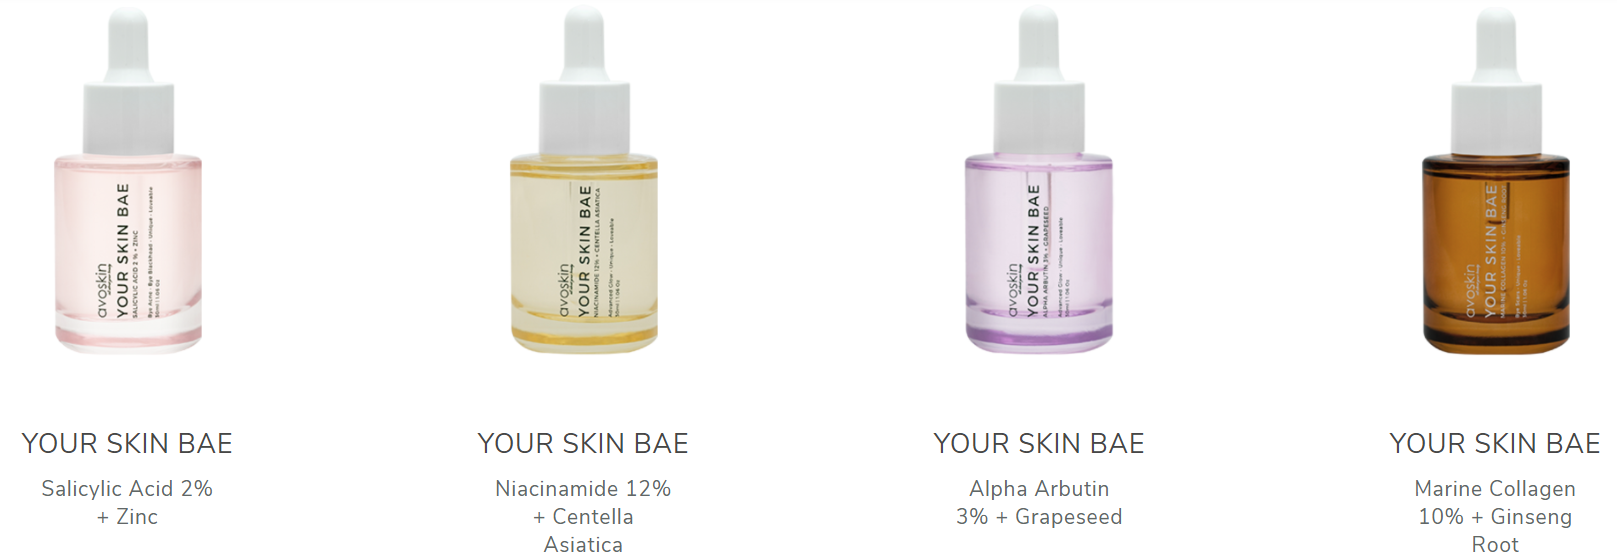

image source: [avoskin](https://www.avoskinbeauty.com/id/your-skin-bae/)

In [183]:
product_df[product_df.product_name.str.lower().str.contains('skin bae')].head(5)

,subcategory,brand,product_name,variant,price,description,link,product_name_variant_concat,num_price
219,Serum & Essence,AVOSKIN,Your Skin Bae Serum,Alpha Arbutin 3% + Grapeseed,Rp. 139.000,Avoskin Your Skin Bae Ultimate Alpha Arbutin 3...,https://reviews.femaledaily.com/products/treat...,Your Skin Bae Serum_Alpha Arbutin 3% + Grapeseed,139000.0
220,Serum & Essence,AVOSKIN,Your Skin Bae Serum,Niacinamide 12% + Centella,Rp. 157.900,Avoskin Your Skin Bae Serum Niacinamide 12% + ...,https://reviews.femaledaily.com/products/treat...,Your Skin Bae Serum_Niacinamide 12% + Centella,157900.0
221,Serum & Essence,AVOSKIN,Your Skin Bae Serum,Marine Collagen 10% + Gingseng Root,Rp. 139.000,Avoskin Your Skin Bae Serum Marine Collagen 10...,https://reviews.femaledaily.com/products/treat...,Your Skin Bae Serum_Marine Collagen 10% + Ging...,139000.0
224,Serum & Essence,AVOSKIN,Your Skin Bae Serum,Salicylic Acid 2% + Zinc,beauty studio,Avoskin Your Skin Bae Serum Salicylic Acid 2% ...,https://reviews.femaledaily.com/products/treat...,Your Skin Bae Serum_Salicylic Acid 2% + Zinc,0.0
225,Serum & Essence,AVOSKIN,Your Skin Bae Serum,Ultimate Hyaluron HYACROSS 3% + Green Tea,beauty studio,Avoskin Your Skin Bae Ultimate Hyaluron HYACRO...,https://reviews.femaledaily.com/products/treat...,Your Skin Bae Serum_Ultimate Hyaluron HYACROSS...,0.0


#### concat product name and its variant

In [37]:
product_df.product_name.duplicated().sum()

702

In [38]:
product_df[['brand', 'product_name']].duplicated().sum()

318

In [39]:
product_df['product_name_variant_concat'] = product_df.apply(lambda x: '_'.join([x.product_name, x.variant]) 
                                                   if pd.notnull(x.variant) else x.product_name, axis=1)

In [40]:
product_df

,subcategory,brand,product_name,variant,price,description,link,product_name_variant_concat
0,Night Cream,Abstract Beauty,"Laili Supra Face Cream, Bidara Series, Laili B...",pelembab,Rp. 45.000,merupakan krim pelembab dari Laily Beauty Bida...,https://reviews.femaledaily.com/products/moist...,"Laili Supra Face Cream, Bidara Series, Laili B..."
1,Sun Protection,Acanthe,Sunscreen Cream SPF 40,NaN,Rp. 150.000,Acanthe Sunscreen Cream SPF 40 merupakan sunsc...,https://reviews.femaledaily.com/products/moist...,Sunscreen Cream SPF 40
2,Serum & Essence,Acanthe,Triple C Serum,NaN,Rp. 1.250.000,Achante Triple C adalah produk dermatologi yan...,https://reviews.femaledaily.com/products/treat...,Triple C Serum
3,Serum & Essence,Aceskin,Ace Face Bright and Glow Serum,NaN,Rp. 189.000,Aceskin Ace Face Bright and Glow Serum merupak...,https://reviews.femaledaily.com/products/treat...,Ace Face Bright and Glow Serum
4,Serum & Essence,Aceskin,Ace Face Age Defying Serum,NaN,Rp. 189.000,Aceskin Ace Face Age Defying Serum merupakan A...,https://reviews.femaledaily.com/products/treat...,Ace Face Age Defying Serum
...,...,...,...,...,...,...,...,...
3776,Night Cream,Zoya Cosmetics,Dream Bright Night Cream,NaN,Rp. 75.000,There's no description for this product.,https://reviews.femaledaily.com/products/moist...,Dream Bright Night Cream
3777,Day Cream,Zoya Cosmetics,Acne Daily Cream,NaN,Rp. 33.000,Zoya Cosmetics Acne Daily Cream merupakan pele...,https://reviews.femaledaily.com/products/moist...,Acne Daily Cream
3778,Scrub & Exfoliator,Zoya Cosmetics,Lip Scrub Sugar ZOYA Cosmetics,Sugar,Rp. 0,There's no description for this product.,https://reviews.femaledaily.com/products/clean...,Lip Scrub Sugar ZOYA Cosmetics_Sugar
3779,Face,Zoya Cosmetics,Cleansing Water,NaN,Rp. 33.000,There's no description for this product.,https://reviews.femaledaily.com/products/makeu...,Cleansing Water


#### convert price type to float

In [43]:
product_df['num_price'] = pd.to_numeric(product_df.price.apply(lambda x: re.sub('\D', '', x)))

In [44]:
product_df.num_price.describe()

count    3.430000e+03
mean     8.542228e+04
std      1.144307e+05
min      0.000000e+00
25%      2.600000e+04
50%      6.300000e+04
75%      1.200000e+05
max      3.500000e+06
Name: num_price, dtype: float64

In [45]:
product_df.num_price.isnull().sum()

348

In [46]:
product_df.num_price = product_df.num_price.fillna(0.0)

In [47]:
product_df.num_price.isnull().sum()

0

In [52]:
product_df.to_csv("Indonesian Skincare Products on Female Daily_August 2021_clean.csv", index=False, header=True)

In [53]:
product_df.to_pickle("Indonesian Skincare Products on Female Daily_August 2021_clean.pkl")

<a id='cleaning_review'></a>
### Cleaning Review Dataset

In [128]:
review_df = pd.read_pickle('Indonesian Skincare Review Female Daily_August 2021_merged.pkl')
review_df.head(5)

,user_name,user_link,star_rating,is_recommend,review_date,user_review,purchase_point,review_link,product_brand,product_name,date_now
0,InaMutmainah,https://reviews.femaledaily.com/user/InaMutmainah,4.0,Yes,27 Mar 2021,"produk ini belom aku buka sama sekali, jadi ak...",Shopee,https://reviews.femaledaily.com/products/moist...,Abstract Beauty,"Laili Supra Face Cream, Bidara Series, Laili B...",2021-08-29 14:36:06.764620
1,Gigi,https://reviews.femaledaily.com/user/Gigi,3.0,Yes,25 Jun 2021,Sunscreen ini enak buat kulit yang kering bang...,Shopee,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:21.205523
2,fzhrifka,https://reviews.femaledaily.com/user/fzhrifka,5.0,Yes,19 May 2020,Juara sunscreen sementara hihi 🥰🥰 Awalnya dire...,Apotek Aji Waras,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:24.412491
3,alcfem,https://reviews.femaledaily.com/user/alcfem,3.0,No,22 Nov 2019,"Di resepin sm dokter kulitku, padahal waktu it...",Apotik,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:30.682982
4,kunyit16,https://reviews.femaledaily.com/user/kunyit16,5.0,,25 Sep 2019,aku sempet lupa sama sunscreen ini karena wakt...,,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:42.951488


In [129]:
review_df.shape

(223173, 11)

In [130]:
review_df.dtypes

user_name          object
user_link          object
star_rating       float64
is_recommend       object
review_date        object
user_review        object
purchase_point     object
review_link        object
product_brand      object
product_name       object
date_now           object
dtype: object

In [132]:
review_df = review_df.replace('', np.nan)

In [133]:
review_df.isnull().sum()

user_name             0
user_link             0
star_rating           0
is_recommend      58937
review_date           0
user_review          60
purchase_point    59024
review_link           0
product_brand         0
product_name          0
date_now              0
dtype: int64

In [134]:
review_df.duplicated().sum()

0

#### convert review time format

In [135]:
review_df[review_df.review_date.str.lower().str.contains(' ago')]

,user_name,user_link,star_rating,is_recommend,review_date,user_review,purchase_point,review_link,product_brand,product_name,date_now
33,indirafhanum,https://reviews.femaledaily.com/user/indirafhanum,3.0,No,2 days ago,"Kena racun tiktok, but I think this product is...",Shopee,https://reviews.femaledaily.com/products/treat...,Acnaway,Anti Acne and Blemish Relief Kit,2021-08-29 14:40:44.185726
34,FriskaAngela02,https://reviews.femaledaily.com/user/FriskaAng...,5.0,Yes,5 days ago,Jujurly ini bagus bgt ternyataaa omg cepet bgt...,Shopee,https://reviews.femaledaily.com/products/treat...,Acnaway,Anti Acne and Blemish Relief Kit,2021-08-29 14:40:47.396356
150,gabriellarachel,https://reviews.femaledaily.com/user/gabriella...,2.0,No,2 days ago,"ga kerja di akuu, meskipun harga nya murah dan...",Shopee,https://reviews.femaledaily.com/products/treat...,Acnol,Lotion for Acne,2021-08-29 14:55:28.685737
151,mutiah02,https://reviews.femaledaily.com/user/mutiah02,3.0,Yes,2 days ago,Aku pribadi kurang suka gatau kenapa. efek men...,Brand website,https://reviews.femaledaily.com/products/treat...,Acnol,Lotion for Acne,2021-08-29 14:55:31.879144
152,jihanmaksum,https://reviews.femaledaily.com/user/jihanmaksum,4.0,Yes,5 days ago,Worth to buy! This product works on me. Si kec...,Century,https://reviews.femaledaily.com/products/treat...,Acnol,Lotion for Acne,2021-08-29 14:55:35.058164
...,...,...,...,...,...,...,...,...,...,...,...
221540,FloCaLia,https://reviews.femaledaily.com/user/FloCaLia,5.0,Yes,5 days ago,"Menurut pengalamanku, ini adalah jenis 'multif...",Shopee,https://reviews.femaledaily.com/products/treat...,Y.O.U Makeups,YOU Multi Purpose Aloe Vera Gel 96%,2021-09-28 17:35:40.206112
221581,INTANINURANISA,https://reviews.femaledaily.com/user/INTANINUR...,4.0,Yes,3 days ago,"beli ini karena lg promo, dari segi packaging ...",Brand website,https://reviews.femaledaily.com/products/moist...,Y.O.U Makeups,Tone Up Elixir Sunscreen SPF 50+ PA+++,2021-09-28 17:38:23.352998
221582,lailaike,https://reviews.femaledaily.com/user/lailaike,5.0,Yes,6 days ago,nyari sunscreen tuh emang tricky banget. kadan...,Brand website,https://reviews.femaledaily.com/products/moist...,Y.O.U Makeups,Tone Up Elixir Sunscreen SPF 50+ PA+++,2021-09-28 17:38:26.538136
221647,INTANINURANISA,https://reviews.femaledaily.com/user/INTANINUR...,4.0,Yes,3 days ago,"beli ini pas lg diskon, dari segi packaging di...",Brand website,https://reviews.femaledaily.com/products/moist...,Y.O.U Makeups,Tone Up UV Elixir SPF50+ PA++++,2021-09-28 17:43:35.908823


In [137]:
review_df['review_date_converted'] = review_df.review_date.str.replace("an hour", "1 hours")
review_df['review_date_converted'] = review_df.review_date_converted.str.replace("a day", "1 days")
review_df['review_date_converted'] = review_df.review_date_converted.str.replace("a few seconds", "1 minutes")

In [138]:
convert_date = review_df['review_date_converted'].to_list()
review_df.date_now = pd.to_datetime(review_df.date_now)

In [139]:
date_convert = []
for index, time in enumerate(convert_date):
    if time[-3:] == 'ago':
        parsed_time = [time.split()[:2]]
        time_dict = dict((format_time,float(amount)) for amount,format_time in parsed_time)
        time_delta = datetime.timedelta(**time_dict)
        past_time = review_df.date_now[index] - time_delta
    else:
        past_time = parser.parse(time).date()
    date_convert.append(past_time)

In [140]:
review_df['review_date_converted'] = date_convert

#### handle missing values

- The missing values of is_recommend and purchase_point have a very consistent rate, about 26% overall. I assume that the value does not exist because is_recommend and purchase_point are new features or were not previously required when the user wrote the review. This is based on my experience as a female daily user who has just seen feature purchase_point last year.

- With that assumption, I categorize the missing data as Missing Completely at Random (MCAR) and impute the missing value with a new category.

#### impute is_recomend missing value

In [141]:
review_df.is_recommend.value_counts()

Yes    145250
No      18986
Name: is_recommend, dtype: int64

In [142]:
review_df.is_recommend.isnull().sum()

58937

In [143]:
review_df.groupby(['star_rating', 'is_recommend'], dropna=False, as_index=False).size()

,star_rating,is_recommend,size
0,1.0,No,2806
1,1.0,Yes,114
2,1.0,NaN,2917
3,1.5,NaN,49
4,2.0,No,6407
5,2.0,Yes,749
6,2.0,NaN,5790
7,2.5,NaN,291
8,3.0,No,8576
9,3.0,Yes,8364


In [144]:
review_df['is_recommend_imputed'] = review_df.is_recommend.fillna('Unknown')

In [145]:
review_df[(review_df.is_recommend.str.lower().str.contains(r'no|yes', na=False))].sort_values(by=['review_date_converted'])

,user_name,user_link,star_rating,is_recommend,review_date,user_review,purchase_point,review_link,product_brand,product_name,date_now,review_date_converted,is_recommend_imputed
74439,peacockgreen,https://reviews.femaledaily.com/user/peacockgreen,1.0,No,28 Aug 2015,"Baunya terlalu kenceng, ga ilang ilang. Masa' ...",Brand website,https://reviews.femaledaily.com/products/moist...,Gizi Cosmetics,Daily Nutrition Cream,2021-09-03 10:36:22.236079,2015-08-28 00:00:00.000000,No
181677,faandry,https://reviews.femaledaily.com/user/faandry,4.0,Yes,26 Sep 2015,"hai akhirnya aku mau review ulang vitacid ini,...",Shopee,https://reviews.femaledaily.com/products/treat...,Vitacid,Retinoic Acid (HARUS DENGAN RESEP DOKTER),2021-09-25 15:27:44.014214,2015-09-26 00:00:00.000000,Yes
206198,lilin_kecil,https://reviews.femaledaily.com/user/lilin_kecil,3.0,Yes,06 Oct 2015,"Olive oil favoritku ini, udah repurchase berka...",Hypermart,https://reviews.femaledaily.com/products/moist...,Wardah,Pure Olive Oil,2021-09-27 19:44:34.314075,2015-10-06 00:00:00.000000,Yes
191867,amelrosana,https://reviews.femaledaily.com/user/amelrosana,4.0,Yes,20 Oct 2015,"aku kenal krim ini udah sejak jaman aku SD, kr...",ADA swalayan,https://reviews.femaledaily.com/products/moist...,Viva Cosmetics,Skin Food Cream,2021-09-26 11:33:48.482389,2015-10-20 00:00:00.000000,Yes
181668,amelrosana,https://reviews.femaledaily.com/user/amelrosana,4.0,Yes,20 Oct 2015,bagus ya produk ini buat ngalemin jerawat-jera...,k24klik,https://reviews.femaledaily.com/products/treat...,Vitacid,Retinoic Acid (HARUS DENGAN RESEP DOKTER),2021-09-25 15:26:04.811435,2015-10-20 00:00:00.000000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213886,akulucu,https://reviews.femaledaily.com/user/akulucu,2.0,No,10 hours ago,cobain karna reviewnya bagus di FD then baru p...,sociolla,https://reviews.femaledaily.com/products/treat...,Whitelab,Brightening Face Serum,2021-09-28 09:55:19.726854,2021-09-27 23:55:19.726854,No
221116,viliyan,https://reviews.femaledaily.com/user/viliyan,5.0,Yes,17 hours ago,weh ini bagus banget??????? beneran nggak boho...,Shopee,https://reviews.femaledaily.com/products/clean...,Whitelab,Exfoliating Toner,2021-09-28 17:05:24.281068,2021-09-28 00:05:24.281068,Yes
213885,gabrielmarella,https://reviews.femaledaily.com/user/gabrielma...,5.0,Yes,8 hours ago,aku sepenuhnya berserah diri sama si serum ini...,Shopee,https://reviews.femaledaily.com/products/treat...,Whitelab,Brightening Face Serum,2021-09-28 09:55:13.530551,2021-09-28 01:55:13.530551,Yes
218014,Chntyafs,https://reviews.femaledaily.com/user/Chntyafs,5.0,Yes,4 hours ago,Cobain acne cream yg bisa meredakan jerawat da...,Shopee,https://reviews.femaledaily.com/products/moist...,Whitelab,Acne Cream,2021-09-28 14:00:17.837446,2021-09-28 10:00:17.837446,Yes


In [146]:
review_df.sort_values(by=['review_date_converted']).head(1)

,user_name,user_link,star_rating,is_recommend,review_date,user_review,purchase_point,review_link,product_brand,product_name,date_now,review_date_converted,is_recommend_imputed
31842,Triiwahyu,https://reviews.femaledaily.com/user/Triiwahyu,4.0,NaN,19 Dec 2013,Krimnya itu ada kaya glitternya2 gitu. Jadi wa...,NaN,https://reviews.femaledaily.com/products/moist...,Citra,Hazeline Spotless White Glow UV,2021-08-31 14:12:30.604762,2013-12-19,Unknown


#### impute purchase point missing value

In [147]:
review_df.purchase_point.value_counts()

Shopee                  61051
Instagram               18135
Brand website           11400
Traditional market       8091
Official Brand Store     6955
                        ...  
You                         1
Top Mode Makassar           1
multibrand store            1
punya ibuku                 1
alf                         1
Name: purchase_point, Length: 2016, dtype: int64

In [148]:
review_df.is_recommend.isnull().sum()

58937

In [149]:
review_df['purchase_point_imputed'] = review_df.purchase_point.fillna('Unknown')

In [150]:
review_df

,user_name,user_link,star_rating,is_recommend,review_date,user_review,purchase_point,review_link,product_brand,product_name,date_now,review_date_converted,is_recommend_imputed,purchase_point_imputed
0,InaMutmainah,https://reviews.femaledaily.com/user/InaMutmainah,4.0,Yes,27 Mar 2021,"produk ini belom aku buka sama sekali, jadi ak...",Shopee,https://reviews.femaledaily.com/products/moist...,Abstract Beauty,"Laili Supra Face Cream, Bidara Series, Laili B...",2021-08-29 14:36:06.764620,2021-03-27,Yes,Shopee
1,Gigi,https://reviews.femaledaily.com/user/Gigi,3.0,Yes,25 Jun 2021,Sunscreen ini enak buat kulit yang kering bang...,Shopee,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:21.205523,2021-06-25,Yes,Shopee
2,fzhrifka,https://reviews.femaledaily.com/user/fzhrifka,5.0,Yes,19 May 2020,Juara sunscreen sementara hihi 🥰🥰 Awalnya dire...,Apotek Aji Waras,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:24.412491,2020-05-19,Yes,Apotek Aji Waras
3,alcfem,https://reviews.femaledaily.com/user/alcfem,3.0,No,22 Nov 2019,"Di resepin sm dokter kulitku, padahal waktu it...",Apotik,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:30.682982,2019-11-22,No,Apotik
4,kunyit16,https://reviews.femaledaily.com/user/kunyit16,5.0,NaN,25 Sep 2019,aku sempet lupa sama sunscreen ini karena wakt...,NaN,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:42.951488,2019-09-25,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223168,mariaaoctaviaa,https://reviews.femaledaily.com/user/mariaaoct...,5.0,NaN,22 Nov 2018,Suka banget banget banget! Ini pembersih muka ...,NaN,https://reviews.femaledaily.com/products/makeu...,Zoya Cosmetics,Cleansing Water,2021-09-28 20:12:54.596881,2018-11-22,Unknown,Unknown
223169,nareiy,https://reviews.femaledaily.com/user/nareiy,4.0,NaN,08 Oct 2018,Aku beli ini karena makeup remover safi susah ...,NaN,https://reviews.femaledaily.com/products/makeu...,Zoya Cosmetics,Cleansing Water,2021-09-28 20:13:06.839775,2018-10-08,Unknown,Unknown
223170,kitchendw,https://reviews.femaledaily.com/user/kitchendw,3.0,Yes,17 Jun 2021,"ini kurang suka sih, karna dia gada busa sama ...",Shopee,https://reviews.femaledaily.com/products/clean...,27Degrees.id,Centella Glow Gentle Facial Wash,2021-09-28 20:13:16.381516,2021-06-17,Yes,Shopee
223171,RosmaCindy,https://reviews.femaledaily.com/user/RosmaCindy,5.0,Yes,29 May 2021,ini cocok banget buat kulit sensitif kaya kuli...,Shopee,https://reviews.femaledaily.com/products/clean...,27Degrees.id,Centella Glow Gentle Facial Wash,2021-09-28 20:13:19.551706,2021-05-29,Yes,Shopee


In [151]:
review_df[review_df.user_review.isnull()]

,user_name,user_link,star_rating,is_recommend,review_date,user_review,purchase_point,review_link,product_brand,product_name,date_now,review_date_converted,is_recommend_imputed,purchase_point_imputed
21200,Pradami,https://reviews.femaledaily.com/user/Pradami,3.0,NaN,13 Sep 2017,NaN,NaN,https://reviews.femaledaily.com/products/clean...,BDL,Papaya Whitening Soap,2021-08-30 19:17:45.373496,2017-09-13,Unknown,Unknown
28777,eviagustina13,https://reviews.femaledaily.com/user/eviagusti...,2.0,NaN,31 Dec 2016,NaN,NaN,https://reviews.femaledaily.com/products/moist...,Citra,Pearly White UV Essence Cream,2021-08-31 08:59:52.985772,2016-12-31,Unknown,Unknown
29943,mauri_f,https://reviews.femaledaily.com/user/mauri_f,3.0,NaN,25 Jan 2018,NaN,NaN,https://reviews.femaledaily.com/products/moist...,Citra,Green Tea Anti Acne Facial Moisturizer,2021-08-31 11:11:11.840392,2018-01-25,Unknown,Unknown
34978,Castiel10,https://reviews.femaledaily.com/user/Castiel10,4.0,NaN,13 May 2016,NaN,NaN,https://reviews.femaledaily.com/products/mask/...,Dapur Kefir,Masker Kefir,2021-08-31 19:28:27.673346,2016-05-13,Unknown,Unknown
58219,icusnabati,https://reviews.femaledaily.com/user/icusnabati,3.5,NaN,29 Mar 2016,NaN,NaN,https://reviews.femaledaily.com/products/clean...,Erha,Acneact Acne Cleanser Scrub Beta Plus,2021-09-02 09:58:31.964739,2016-03-29,Unknown,Unknown
61400,shintiaandriani,https://reviews.femaledaily.com/user/shintiaan...,4.0,NaN,21 Nov 2016,NaN,NaN,https://reviews.femaledaily.com/products/mask/...,esene,Face Mask Collagen,2021-09-02 15:52:16.883237,2016-11-21,Unknown,Unknown
76205,Rsnikartika,https://reviews.femaledaily.com/user/Rsnikartika,2.0,NaN,24 Nov 2017,NaN,NaN,https://reviews.femaledaily.com/products/treat...,Guardian,Aloe Vera Gel,2021-09-03 15:20:11.510340,2017-11-24,Unknown,Unknown
84203,dindatri2693,https://reviews.femaledaily.com/user/dindatri2693,4.0,NaN,03 Jan 2018,NaN,NaN,https://reviews.femaledaily.com/products/treat...,humphrey,Spot Serum,2021-09-04 06:02:46.355837,2018-01-03,Unknown,Unknown
92160,kyuori,https://reviews.femaledaily.com/user/kyuori,5.0,NaN,17 May 2016,NaN,NaN,https://reviews.femaledaily.com/products/treat...,La Tulipe,Acne Lotion,2021-09-05 02:53:23.721325,2016-05-17,Unknown,Unknown
100104,joamidala,https://reviews.femaledaily.com/user/joamidala,3.0,NaN,28 Jan 2018,NaN,NaN,https://reviews.femaledaily.com/products/makeu...,Make Over,Make Up Remover,2021-09-05 18:07:48.719736,2018-01-28,Unknown,Unknown


In [170]:
review_df.to_csv("Indonesian Skincare Review on Female Daily_August 2021_transform.csv", index=False, header=True)

In [171]:
review_df.to_pickle("Indonesian Skincare Review on Female Daily_August 2021_transform.pkl")

<a id='cleaning_user'></a>
### Cleaning User Dataset

In [152]:
user_df = pd.read_pickle('Indonesian Skincare User Profile Female Daily_August 2021.pkl')
user_df.head(5)

,location,age_range,follower,following,post,review_count,skin_type,skin_tone,skin_undertone,hair_type,colored_hair,hijaber,skin_concern,body_concern,hair_concern,user_link
0,Surabaya,19 - 24,0,3,0,1,Oily,Medium,Neutral,Straight,No,Yes,"Acne, Sensitivity, Hyperpigmentation/Uneven Sk...","Hyperpigmentation, Body Acne, Unwanted Hair","Dryness, Damaged",https://reviews.femaledaily.com/user/InaMutmainah
1,Bandung,30 - 34,155,143,60,312,Dry,Medium,Neutral,Straight,No,Yes,"Dehydrated, Acne, Large Pores, Hyperpigmentati...","Dryness, Roughness","Dandruff, Dryness",https://reviews.femaledaily.com/user/Gigi
2,Jakarta,19 - 24,30,18,41,41,Combination,Medium,Warm,Straight,Yes,No,"Sensitivity, Large Pores, Dullness, Hyperpigme...","Stretch Marks, Sensitivity, Dryness, Cellulite...","Dandruff, Hair Loss, Oily Scalp, Flatness",https://reviews.femaledaily.com/user/fzhrifka
3,Bandung,19 - 24,429,221,0,347,Combination,Light,Warm,Wavy,No,Yes,"Large Pores, Hyperpigmentation/Uneven Skin Ton...","Stretch Marks, Dryness, Cellulite, Uneven Skin...","Hair Loss, Dryness, Frizz, Flatness",https://reviews.femaledaily.com/user/alcfem
4,Malang,35 - 39,0,5,0,5,Combination,Medium,Neutral,Curly,No,Yes,"Dehydrated, Acne, Wrinkles, Large Pores, Hyper...","Stretch Marks, Cellulite, Loose Skin",Hair Loss,https://reviews.femaledaily.com/user/kunyit16


In [153]:
user_df.shape

(53212, 16)

In [154]:
user_df.dtypes

location          object
age_range         object
follower          object
following         object
post              object
review_count      object
skin_type         object
skin_tone         object
skin_undertone    object
hair_type         object
colored_hair      object
hijaber           object
skin_concern      object
body_concern      object
hair_concern      object
user_link         object
dtype: object

In [155]:
user_df.duplicated().sum()

0

In [156]:
user_df.isnull().sum()

location          0
age_range         0
follower          0
following         0
post              0
review_count      0
skin_type         0
skin_tone         0
skin_undertone    0
hair_type         0
colored_hair      0
hijaber           0
skin_concern      0
body_concern      0
hair_concern      0
user_link         0
dtype: int64

In [157]:
user_df.describe(include='object')

,location,age_range,follower,following,post,review_count,skin_type,skin_tone,skin_undertone,hair_type,colored_hair,hijaber,skin_concern,body_concern,hair_concern,user_link
count,53212,53212,53212,53212,53212,53212,53212,53212,53212,53212,53212,53212,53212,53212,53212,53212
unique,105,8,505,407,270,447,5,6,4,4,3,3,2488,1634,832,53212
top,Jakarta,19 - 24,0,3,0,1,Combination,Medium,Neutral,Straight,No,Yes,Acne,Dryness,Hair Loss,https://reviews.femaledaily.com/user/dewi_as
freq,10769,27457,28685,20870,34143,5546,24172,21350,30359,26252,36692,32624,1518,5212,4501,1


#### convert follower value to integer

In [158]:
user_df[user_df.follower.str.lower().str.contains('k')]

,location,age_range,follower,following,post,review_count,skin_type,skin_tone,skin_undertone,hair_type,colored_hair,hijaber,skin_concern,body_concern,hair_concern,user_link
36,Yogyakarta,19 - 24,1K,148,251,454,Combination,Medium,Warm,Straight,Yes,No,"Dehydrated, Large Pores, Dullness, Hyperpigmen...","Stretch Marks, Dryness, Hyperpigmentation, Une...","Hair Loss, Dryness, Flatness",https://reviews.femaledaily.com/user/ameisya
487,Tangerang,19 - 24,1K,1K,259,248,Oily,Medium,Neutral,Straight,Yes,Yes,"Dehydrated, Acne, Large Pores, Hyperpigmentati...","Dryness, Hyperpigmentation, Body Acne, Uneven ...","Dandruff, Frizz, Oily Scalp, Damaged",https://reviews.femaledaily.com/user/AuraIsabelle
1114,Samarinda,25 - 29,1.4K,100,127,597,Oily,Medium Light,Warm,Straight,No,Yes,"Acne, Dullness, Hyperpigmentation/Uneven Skin ...","Cellulite, Uneven Skin Tone, Unwanted Hair, Du...","Dandruff, Hair Loss",https://reviews.femaledaily.com/user/farahdita...
1869,Depok,35 - 39,1.3K,215,548,185,Normal,Medium,Warm,Wavy,Yes,Yes,"Dehydrated, Acne, Hyperpigmentation/Uneven Ski...","Stretch Marks, Dryness, Hyperpigmentation, Cel...","Hair Loss, Dryness, Frizz, Grey Hair",https://reviews.femaledaily.com/user/ms_geey
3290,Jakarta,25 - 29,1.1K,336,279,515,Combination,Light,Warm,Curly,No,No,"Dullness, Hyperpigmentation/Uneven Skin Tone, ...","Stretch Marks, Cellulite, Body Acne, Uneven Sk...",Oily Scalp,https://reviews.femaledaily.com/user/Hanafeberia
3918,Yogyakarta,25 - 29,1K,231,323,532,Combination,Medium Light,Neutral,Straight,No,No,"Dehydrated, Wrinkles, Sensitivity, Large Pores...","Stretch Marks, Sensitivity, Dryness, Cellulite","Dandruff, Dryness, Damaged, Split Ends",https://reviews.femaledaily.com/user/lazhimah
4525,Jakarta,19 - 24,1.5K,71,228,408,Oily,Medium Light,Neutral,Wavy,No,Yes,"Acne, Dullness, Hyperpigmentation/Uneven Skin ...",Cellulite,"Hair Loss, Frizz, Flatness",https://reviews.femaledaily.com/user/soyImani
4565,South Tangerang,25 - 29,1.3K,210,245,309,Dry,Medium Light,Neutral,Wavy,Yes,No,"Dehydrated, Dullness, Hyperpigmentation/Uneven...","Stretch Marks, Dryness, Hyperpigmentation, Cel...","Dryness, Frizz, Damaged, Split Ends, Grey Hair",https://reviews.femaledaily.com/user/AjengNind...
4634,Jakarta,25 - 29,2.6K,149,278,258,Combination,Medium Light,Neutral,Straight,No,No,"Dehydrated, Hyperpigmentation/Uneven Skin Tone...","Stretch Marks, Sensitivity, Dryness","Hair Loss, Oily Scalp, Sensitive Scalp",https://reviews.femaledaily.com/user/Fwnda
5274,Jakarta,40 - 44,1.7K,139,394,283,Combination,Medium Dark,Warm,Wavy,Yes,No,"Dehydrated, Sensitivity, Hyperpigmentation/Une...","Stretch Marks, Sensitivity, Dryness, Cellulite...","Dryness, Frizz, Grey Hair",https://reviews.femaledaily.com/user/dee2578


In [159]:
def k_to_ribu(string):
    if string[-1].lower() == 'k':
        return int(float(string.lower().split('k')[0])*1000)
    else:
        return int(string)

In [160]:
string_to_int = user_df[['follower', 'following', 'post', 'review_count']]
for column in string_to_int:
    user_df[column + '_int'] = string_to_int[column].apply(lambda x: k_to_ribu(x))

In [161]:
user_df = user_df.replace('-', '')

In [162]:
string_to_list = user_df[['skin_concern', 'body_concern', 'hair_concern']]
for column in string_to_list:
    user_df[column + '_split'] = string_to_list[column].apply(lambda x: x.split(', '))

In [163]:
user_df = user_df.replace('', np.nan)

In [164]:
user_df.isnull().sum()

location                 0
age_range              257
follower                 0
following                0
post                     0
review_count             0
skin_type              622
skin_tone              634
skin_undertone         631
hair_type              636
colored_hair           790
hijaber                775
skin_concern          1373
body_concern          1605
hair_concern          1546
user_link                0
follower_int             0
following_int            0
post_int                 0
review_count_int         0
skin_concern_split       0
body_concern_split       0
hair_concern_split       0
dtype: int64

In [165]:
user_df.duplicated(subset = ['location', 'age_range', 'skin_type', 'skin_tone', 'skin_undertone', 'hair_type', 
                             'colored_hair', 'hijaber', 'skin_concern', 'body_concern', 'hair_concern']).sum()

479

In [166]:
user_df[user_df.duplicated(subset = ['location', 'age_range', 'skin_type', 'skin_tone', 'skin_undertone', 'hair_type', 
                             'colored_hair', 'hijaber', 'skin_concern', 'body_concern', 'hair_concern'], keep = False)]

,location,age_range,follower,following,post,review_count,skin_type,skin_tone,skin_undertone,hair_type,...,body_concern,hair_concern,user_link,follower_int,following_int,post_int,review_count_int,skin_concern_split,body_concern_split,hair_concern_split
15,Jakarta,25 - 29,0,3,0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,https://reviews.femaledaily.com/user/Osi95,0,3,0,1,[],[],[]
612,Jakarta,19 - 24,0,3,0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,https://reviews.femaledaily.com/user/sesekarsp,0,3,0,1,[],[],[]
1278,Banjarmasin,18 and Under,0,5,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,https://reviews.femaledaily.com/user/mochaleva,0,5,0,0,[],[],[]
1458,Bogor,25 - 29,0,0,0,6,NaN,NaN,NaN,NaN,...,NaN,NaN,https://reviews.femaledaily.com/user/prayanasari,0,0,0,6,[],[],[]
1741,Pontianak,19 - 24,0,3,0,3,NaN,NaN,NaN,NaN,...,NaN,NaN,https://reviews.femaledaily.com/user/Yuliansyah,0,3,0,3,[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53087,Cirebon,19 - 24,0,3,0,6,NaN,NaN,NaN,NaN,...,NaN,NaN,https://reviews.femaledaily.com/user/Yantisafi...,0,3,0,6,[],[],[]
53091,Jakarta,18 and Under,0,3,0,8,Oily,Medium Dark,Neutral,Wavy,...,NaN,NaN,https://reviews.femaledaily.com/user/dewigita12,0,3,0,8,[],[],[]
53112,Sukabumi,19 - 24,0,3,0,2,NaN,NaN,NaN,NaN,...,NaN,NaN,https://reviews.femaledaily.com/user/Fridaseti...,0,3,0,2,[],[],[]
53135,Medan,25 - 29,0,3,0,2,NaN,NaN,NaN,NaN,...,NaN,NaN,https://reviews.femaledaily.com/user/sarimeuthia,0,3,0,2,[],[],[]


In [167]:
user_df

,location,age_range,follower,following,post,review_count,skin_type,skin_tone,skin_undertone,hair_type,...,body_concern,hair_concern,user_link,follower_int,following_int,post_int,review_count_int,skin_concern_split,body_concern_split,hair_concern_split
0,Surabaya,19 - 24,0,3,0,1,Oily,Medium,Neutral,Straight,...,"Hyperpigmentation, Body Acne, Unwanted Hair","Dryness, Damaged",https://reviews.femaledaily.com/user/InaMutmainah,0,3,0,1,"[Acne, Sensitivity, Hyperpigmentation/Uneven S...","[Hyperpigmentation, Body Acne, Unwanted Hair]","[Dryness, Damaged]"
1,Bandung,30 - 34,155,143,60,312,Dry,Medium,Neutral,Straight,...,"Dryness, Roughness","Dandruff, Dryness",https://reviews.femaledaily.com/user/Gigi,155,143,60,312,"[Dehydrated, Acne, Large Pores, Hyperpigmentat...","[Dryness, Roughness]","[Dandruff, Dryness]"
2,Jakarta,19 - 24,30,18,41,41,Combination,Medium,Warm,Straight,...,"Stretch Marks, Sensitivity, Dryness, Cellulite...","Dandruff, Hair Loss, Oily Scalp, Flatness",https://reviews.femaledaily.com/user/fzhrifka,30,18,41,41,"[Sensitivity, Large Pores, Dullness, Hyperpigm...","[Stretch Marks, Sensitivity, Dryness, Cellulit...","[Dandruff, Hair Loss, Oily Scalp, Flatness]"
3,Bandung,19 - 24,429,221,0,347,Combination,Light,Warm,Wavy,...,"Stretch Marks, Dryness, Cellulite, Uneven Skin...","Hair Loss, Dryness, Frizz, Flatness",https://reviews.femaledaily.com/user/alcfem,429,221,0,347,"[Large Pores, Hyperpigmentation/Uneven Skin To...","[Stretch Marks, Dryness, Cellulite, Uneven Ski...","[Hair Loss, Dryness, Frizz, Flatness]"
4,Malang,35 - 39,0,5,0,5,Combination,Medium,Neutral,Curly,...,"Stretch Marks, Cellulite, Loose Skin",Hair Loss,https://reviews.femaledaily.com/user/kunyit16,0,5,0,5,"[Dehydrated, Acne, Wrinkles, Large Pores, Hype...","[Stretch Marks, Cellulite, Loose Skin]",[Hair Loss]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53207,Surabaya,19 - 24,0,3,0,1,Oily,Medium Light,Neutral,Straight,...,"Stretch Marks, Dryness, Body Acne, Uneven Skin...","Dandruff, Hair Loss, Dryness, Oily Scalp, Flat...",https://reviews.femaledaily.com/user/Restyayu,0,3,0,1,"[Dehydrated, Acne, Sensitivity, Large Pores, D...","[Stretch Marks, Dryness, Body Acne, Uneven Ski...","[Dandruff, Hair Loss, Dryness, Oily Scalp, Fla..."
53208,Blitar,19 - 24,5,8,4,11,Oily,Medium Light,Neutral,Straight,...,"Stretch Marks, Uneven Skin Tone, Unwanted Hair...","Hair Loss, Oily Scalp, Sensitive Scalp",https://reviews.femaledaily.com/user/Lindwika,5,8,4,11,"[Acne, Large Pores, Hyperpigmentation/Uneven S...","[Stretch Marks, Uneven Skin Tone, Unwanted Hai...","[Hair Loss, Oily Scalp, Sensitive Scalp]"
53209,Pekanbaru,19 - 24,0,3,0,1,Combination,Medium Light,Warm,Straight,...,Uneven Skin Tone,Hair Loss,https://reviews.femaledaily.com/user/rizkawula...,0,3,0,1,[Black or White Heads],[Uneven Skin Tone],[Hair Loss]
53210,Bandung,19 - 24,7,7,2,20,Combination,Medium,Neutral,Straight,...,"Stretch Marks, Dryness, Cellulite, Roughness","Dandruff, Hair Loss, Dryness",https://reviews.femaledaily.com/user/cmnura_,7,7,2,20,"[Acne, Dullness, Black or White Heads]","[Stretch Marks, Dryness, Cellulite, Roughness]","[Dandruff, Hair Loss, Dryness]"


In [172]:
user_df.to_csv("Indonesian Skincare User Demographics on Female Daily_August 2021_transform.csv", index=False, header=True)

In [173]:
user_df.to_pickle("Indonesian Skincare User Demographics on Female Daily_August 2021_transform.pkl")

<a id='anonymize'></a>
### Anonymized Usernames

In [184]:
source = r"C:\Users\hwulanayu\Documents\webscrape\Indonesian Skincare Review on Female Daily_August 2021_transform.csv"
target = r"C:\Users\hwulanayu\Documents\webscrape\Indonesian Skincare Review on Female Daily_August 2021_transform_anonym.csv"

In [185]:
def anonymize_rows(rows):
    faker  = Factory.create('id_ID')
    user_names  = defaultdict(faker.user_name)

    for row in rows:
        row['user_name']  = user_names[row['user_name']]
        yield row

In [186]:
def anonymize(source, target):
    with open(source, 'r', encoding="cp437", errors='ignore') as f:
        with open(target, 'w', encoding="cp437", errors='ignore') as o:
            reader = csv.DictReader(f)
            writer = csv.DictWriter(o, reader.fieldnames)  
            writer.writeheader()

            for row in anonymize_rows(reader):
                writer.writerow(row)

In [189]:
anonymize(source, target)

In [205]:
review_anonymized_df = pd.read_csv('Indonesian Skincare Review on Female Daily_August 2021_transform_anonym.csv')

In [206]:
review_anonymized_df.head(5)

,user_name,user_link,star_rating,is_recommend,review_date,user_review,purchase_point,review_link,product_brand,product_name,date_now,review_date_converted,is_recommend_imputed,purchase_point_imputed
0,argono42,https://reviews.femaledaily.com/user/InaMutmainah,4.0,Yes,27 Mar 2021,"produk ini belom aku buka sama sekali, jadi ak...",Shopee,https://reviews.femaledaily.com/products/moist...,Abstract Beauty,"Laili Supra Face Cream, Bidara Series, Laili B...",2021-08-29 14:36:06.764620,2021-03-27 00:00:00.000000,Yes,Shopee
1,waluyoanggraini,https://reviews.femaledaily.com/user/Gigi,3.0,Yes,25 Jun 2021,Sunscreen ini enak buat kulit yang kering bang...,Shopee,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:21.205523,2021-06-25 00:00:00.000000,Yes,Shopee
2,balamandasari,https://reviews.femaledaily.com/user/fzhrifka,5.0,Yes,19 May 2020,Juara sunscreen sementara hihi 🥰🥰 Awalnya dire...,Apotek Aji Waras,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:24.412491,2020-05-19 00:00:00.000000,Yes,Apotek Aji Waras
3,karya19,https://reviews.femaledaily.com/user/alcfem,3.0,No,22 Nov 2019,"Di resepin sm dokter kulitku, padahal waktu it...",Apotik,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:30.682982,2019-11-22 00:00:00.000000,No,Apotik
4,mahesa51,https://reviews.femaledaily.com/user/kunyit16,5.0,NaN,25 Sep 2019,aku sempet lupa sama sunscreen ini karena wakt...,NaN,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:42.951488,2019-09-25 00:00:00.000000,Unknown,Unknown


<a id='foreign_keys'></a>
### Foreign Keys 

* User Dataset
    - PK: user_name
* Review Dataset
    - PK: dataframe index
    - FK: user_name, review_link_id
* Product Dataset
    - PK: dataframe index
    - FK: review_link_id

*PK = Primary Key, FK = Foreign Key

#### drop user_link and add anonymized user_name as foreign key to Review Dataset in User Dataset

In [207]:
user_df = pd.read_pickle('Indonesian Skincare User Profile Female Daily_August 2021.pkl')
user_df.head(5)

,location,age_range,follower,following,post,review_count,skin_type,skin_tone,skin_undertone,hair_type,colored_hair,hijaber,skin_concern,body_concern,hair_concern,user_link
0,Surabaya,19 - 24,0,3,0,1,Oily,Medium,Neutral,Straight,No,Yes,"Acne, Sensitivity, Hyperpigmentation/Uneven Sk...","Hyperpigmentation, Body Acne, Unwanted Hair","Dryness, Damaged",https://reviews.femaledaily.com/user/InaMutmainah
1,Bandung,30 - 34,155,143,60,312,Dry,Medium,Neutral,Straight,No,Yes,"Dehydrated, Acne, Large Pores, Hyperpigmentati...","Dryness, Roughness","Dandruff, Dryness",https://reviews.femaledaily.com/user/Gigi
2,Jakarta,19 - 24,30,18,41,41,Combination,Medium,Warm,Straight,Yes,No,"Sensitivity, Large Pores, Dullness, Hyperpigme...","Stretch Marks, Sensitivity, Dryness, Cellulite...","Dandruff, Hair Loss, Oily Scalp, Flatness",https://reviews.femaledaily.com/user/fzhrifka
3,Bandung,19 - 24,429,221,0,347,Combination,Light,Warm,Wavy,No,Yes,"Large Pores, Hyperpigmentation/Uneven Skin Ton...","Stretch Marks, Dryness, Cellulite, Uneven Skin...","Hair Loss, Dryness, Frizz, Flatness",https://reviews.femaledaily.com/user/alcfem
4,Malang,35 - 39,0,5,0,5,Combination,Medium,Neutral,Curly,No,Yes,"Dehydrated, Acne, Wrinkles, Large Pores, Hyper...","Stretch Marks, Cellulite, Loose Skin",Hair Loss,https://reviews.femaledaily.com/user/kunyit16


In [208]:
user_df.shape

(53212, 16)

In [209]:
user_anonymized_df = user_df.merge(review_anonymized_df.drop_duplicates(subset=['user_link']), how='left').iloc[:, :17].drop(['user_link'], axis=1)

In [210]:
user_anonymized_df.head()

,location,age_range,follower,following,post,review_count,skin_type,skin_tone,skin_undertone,hair_type,colored_hair,hijaber,skin_concern,body_concern,hair_concern,user_name
0,Surabaya,19 - 24,0,3,0,1,Oily,Medium,Neutral,Straight,No,Yes,"Acne, Sensitivity, Hyperpigmentation/Uneven Sk...","Hyperpigmentation, Body Acne, Unwanted Hair","Dryness, Damaged",argono42
1,Bandung,30 - 34,155,143,60,312,Dry,Medium,Neutral,Straight,No,Yes,"Dehydrated, Acne, Large Pores, Hyperpigmentati...","Dryness, Roughness","Dandruff, Dryness",waluyoanggraini
2,Jakarta,19 - 24,30,18,41,41,Combination,Medium,Warm,Straight,Yes,No,"Sensitivity, Large Pores, Dullness, Hyperpigme...","Stretch Marks, Sensitivity, Dryness, Cellulite...","Dandruff, Hair Loss, Oily Scalp, Flatness",balamandasari
3,Bandung,19 - 24,429,221,0,347,Combination,Light,Warm,Wavy,No,Yes,"Large Pores, Hyperpigmentation/Uneven Skin Ton...","Stretch Marks, Dryness, Cellulite, Uneven Skin...","Hair Loss, Dryness, Frizz, Flatness",karya19
4,Malang,35 - 39,0,5,0,5,Combination,Medium,Neutral,Curly,No,Yes,"Dehydrated, Acne, Wrinkles, Large Pores, Hyper...","Stretch Marks, Cellulite, Loose Skin",Hair Loss,mahesa51


In [211]:
user_anonymized_df.shape

(53212, 16)

In [213]:
review_anonymized_df = review_anonymized_df.drop('user_link', axis = 1)

In [215]:
review_anonymized_df.head()

,user_name,star_rating,is_recommend,review_date,user_review,purchase_point,review_link,product_brand,product_name,date_now,review_date_converted,is_recommend_imputed,purchase_point_imputed
0,argono42,4.0,Yes,27 Mar 2021,"produk ini belom aku buka sama sekali, jadi ak...",Shopee,https://reviews.femaledaily.com/products/moist...,Abstract Beauty,"Laili Supra Face Cream, Bidara Series, Laili B...",2021-08-29 14:36:06.764620,2021-03-27 00:00:00.000000,Yes,Shopee
1,waluyoanggraini,3.0,Yes,25 Jun 2021,Sunscreen ini enak buat kulit yang kering bang...,Shopee,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:21.205523,2021-06-25 00:00:00.000000,Yes,Shopee
2,balamandasari,5.0,Yes,19 May 2020,Juara sunscreen sementara hihi 🥰🥰 Awalnya dire...,Apotek Aji Waras,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:24.412491,2020-05-19 00:00:00.000000,Yes,Apotek Aji Waras
3,karya19,3.0,No,22 Nov 2019,"Di resepin sm dokter kulitku, padahal waktu it...",Apotik,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:30.682982,2019-11-22 00:00:00.000000,No,Apotik
4,mahesa51,5.0,NaN,25 Sep 2019,aku sempet lupa sama sunscreen ini karena wakt...,NaN,https://reviews.femaledaily.com/products/moist...,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:42.951488,2019-09-25 00:00:00.000000,Unknown,Unknown


In [216]:
user_anonymized_df.to_csv("Indonesian Skincare User Demographics on Female Daily_August 2021_transform_anonym.csv", index=False, header=True)

In [217]:
user_anonymized_df.to_pickle("Indonesian Skincare User Demographics on Female Daily_August 2021_transform_anonym.pkl")

#### add review_link_id as foreign key to Product Dataset in Review Dataset

In [219]:
pd.set_option("display.max_columns", None,'display.max_colwidth', None)

In [218]:
review_anonymized_df['review_link_id'] = review_anonymized_df.review_link.apply(lambda x: ''.join(re.split('(page=)', x)[:2]) + '1')

In [220]:
review_anonymized_df

,user_name,star_rating,is_recommend,review_date,user_review,purchase_point,review_link,product_brand,product_name,date_now,review_date_converted,is_recommend_imputed,purchase_point_imputed,review_link_id
0,argono42,4.0,Yes,27 Mar 2021,"produk ini belom aku buka sama sekali, jadi aku ga tau gimana efeknya, yg ku tau produk dari Bidara Series nya si Laily ini memang terbuat dari bahan dasar daun Bidara, dan dia free alcohol. untuk yg minat bisa wa aku ini ada 1 dikasih temen dan belom ku buka sama skali bahkan dari plastik nya. wa : 0851-5722-0474",Shopee,https://reviews.femaledaily.com/products/moisturizer/night-cream-16/abstract-beauty/laili-supra-face-cream-bidara-series-laili-beauty-skincare?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1,Abstract Beauty,"Laili Supra Face Cream, Bidara Series, Laili Beauty Skincare",2021-08-29 14:36:06.764620,2021-03-27 00:00:00.000000,Yes,Shopee,https://reviews.femaledaily.com/products/moisturizer/night-cream-16/abstract-beauty/laili-supra-face-cream-bidara-series-laili-beauty-skincare?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1
1,waluyoanggraini,3.0,Yes,25 Jun 2021,"Sunscreen ini enak buat kulit yang kering banget, Texturenya cream dan greasy banget kalau langsung di pakai 2 jari ke muka, jadi pakainya harus dikit-dikit, Whitecast juga tipis aja, bikin kulit sehat glowing gitu. Spf nya cuma 30 sih, cocok buat daily yang kerjanya di indoor. Kalau panas2an keringetan cepet luntur. Kalau kulit lg jerawatan pakai ini, kayak ada cekit-cekitnya. Jadi aku pakai sesuaiin aja sm kondisi kulit.",Shopee,https://reviews.femaledaily.com/products/moisturizer/sun-protection-44/acanthe/sunscreen-cream-spf-40?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:21.205523,2021-06-25 00:00:00.000000,Yes,Shopee,https://reviews.femaledaily.com/products/moisturizer/sun-protection-44/acanthe/sunscreen-cream-spf-40?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1
2,balamandasari,5.0,Yes,19 May 2020,"Juara sunscreen sementara hihi 🥰🥰 Awalnya direkomendasiin sama dokter spkk ku, soalnya kulit aku lumayan sensitive dan aku ada eczema jadi harus super picky in choosing products. Gak ada masalah sama sekali sejauh ini sama sunscreen ini, tubenya kecil jd travel friendly, white cast cuma sedikit banget, dan absorbable hihi. Bikin berminyak gak? Enggak sih biasa aja di kulitku yg half oily half dry. Biasa pake setiap hari buat sekolah",Apotek Aji Waras,https://reviews.femaledaily.com/products/moisturizer/sun-protection-44/acanthe/sunscreen-cream-spf-40?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:24.412491,2020-05-19 00:00:00.000000,Yes,Apotek Aji Waras,https://reviews.femaledaily.com/products/moisturizer/sun-protection-44/acanthe/sunscreen-cream-spf-40?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1
3,karya19,3.0,No,22 Nov 2019,"Di resepin sm dokter kulitku, padahal waktu itu ke dokter buat konsul ttg keloid di dada tp doi kekeuh pgn resepin ss yg tidak aku butuhkan🤣 Konsistensinya cream agak kentel gitu sih, trs ada whitecastnya jg. Hmmmm ini bikin kulitku berminyak, awal pemakaian sih bikin glowing tp overtime dia jd minyak. Kalau kena air dia luntur shay🤣🤣🤣",Apotik,https://reviews.femaledaily.com/products/moisturizer/sun-protection-44/acanthe/sunscreen-cream-spf-40?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:30.682982,2019-11-22 00:00:00.000000,No,Apotik,https://reviews.femaledaily.com/products/moisturizer/sun-protection-44/acanthe/sunscreen-cream-spf-40?cat

In [221]:
product_df

,subcategory,brand,product_name,variant,price,description,link,product_name_variant_concat,num_price
0,Night Cream,Abstract Beauty,"Laili Supra Face Cream, Bidara Series, Laili Beauty Skincare",pelembab,Rp. 45.000,"merupakan krim pelembab dari Laily Beauty Bidara Series , non alcohol dan berfungsi untuk mencerahkan, merawat, menghidrasi, dan menutrisi kulit. terbuat dari bahan dasar daun Bidara.",https://reviews.femaledaily.com/products/moisturizer/night-cream-16/abstract-beauty/laili-supra-face-cream-bidara-series-laili-beauty-skincare?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1,"Laili Supra Face Cream, Bidara Series, Laili Beauty Skincare_pelembab",45000.0
1,Sun Protection,Acanthe,Sunscreen Cream SPF 40,NaN,Rp. 150.000,"Acanthe Sunscreen Cream SPF 40 merupakan sunscreen dengan tekstur krim yang digunakan untuk melindungi wajah dari sinar matahari dan sinar UVA dan UVB. Mencegah munculnya noda-noda hitam dan penuaan dini yang dapat disebabkan oleh sinar matahari. Diformulasikan dengan formulasi khusus PABA-Free.\n\nHow to Use:\nAplikasikan pada wajah dan leher secara merata\n\nSuitable for:\nSemua jenis kulit\n\nIngredients:\nAqua, Sensanov WR, LS Diol, Smulgel NS, Sunclear T40C, Silicon Copolymer, isononyl isononanoate ester, Diisopropyl adipate, Isodecyl neopentanoate, diisopropyl sebacate, lauryl lactate, L-Ascorbic Acid, Parfum.",https://reviews.femaledaily.com/products/moisturizer/sun-protection-44/acanthe/sunscreen-cream-spf-40?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1,Sunscreen Cream SPF 40,150000.0
2,Serum & Essence,Acanthe,Triple C Serum,NaN,Rp. 1.250.000,"Achante Triple C adalah produk dermatologi yang dapat memenuhi kebutuhan kulit. Produk ini mengandung kombinasi unik 3 jenis vitamin C yang digabungkan dengan alpha hydroxyl acid (asam glikolit dan asam laktat) serta ekstrak-ekstrak yang berkhasiat dalam mengangkat kulit mati agar kulit menjadi lebih halus. Selain itu, dapat membantu menjaga kekencangan dan elastisitas kulit dan mencerahkan serta menutrisi kulit.\n\nHow to Use:\nSemprotkan pada wajah dan biarkan sampai meresap dengan sempurna\n\nSuitable for:\nSemua jenis kulit\n\nIngredients:\n-",https://reviews.femaledaily.com/products/treatment/serum-essence-23/acanthe/triple-c-serum?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1,Triple C Serum,1250000.0
3,Serum & Essence,Aceskin,Ace Face Bright and Glow Serum,NaN,Rp. 189.000,"Aceskin Ace Face Bright and Glow Serum merupakan serum yang bisa membantu menyamarkan noda hitam, mengencangkan kulit, dan mengurangi kerutan. Dengan kandungan Vitamin C, serum ini akan menstimulasi produksi kolagen untuk regenerasi dan mencerahkan kulit wajah. Selain itu serum ini juga mengandung Niacinamide yang dapat mengurangi hiperpigmentasi dan juga memperbaiki tekstur kulit. Galactomyces Ferment Filtrate sebagai agen anti oksidan.\n\nHow to use:\nACE Face Bright and Glow Serum digunakan pada pagi hari setelah menggunakan cleanser dan toner. Ratakan 4 tetes ACE Face bright and glow serum ke seluruh wajah. Gunakan moisturizer dan sunscreen secara teratur setelahnya.\n\nSuitable for:\nSemua jenis kulit\n\nIngredients:\nVitamin C, Niacinamide, Galactomyces Ferment Filtrate",https://reviews.femaledaily.com/products/treatment/serum-essence-23/aceskin/face-bright-and-glow-serum?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1,Ace Face Bright and Glow Serum,189000.0
4,Serum & Essence,Aceskin,Ace Face Age Defying Serum,NaN,Rp. 189.000,"Aceskin Ace Face Age Defying Serum merupakan Anti Aging Serum yang digunakan pada malam hari untuk membantu memperbaiki kondisi kulit. Dengan kandungan retinol, serum ini mampu meningkatkan produksi kolagen dan sel kulit baru. Mampu menyamarkan garis halus, noda hitam, bekas jerawat, serta warna kulit yang tidak me

In [222]:
product_df.shape

(3778, 9)

In [224]:
product_df = product_df.merge(review_anonymized_df.drop_duplicates(subset=['review_link_id']), how='left', left_on = 'link', right_on = 'review_link_id')

In [225]:
product_df

,subcategory,brand,product_name_x,variant,price,description,link,product_name_variant_concat,num_price,user_name,star_rating,is_recommend,review_date,user_review,purchase_point,review_link,product_brand,product_name_y,date_now,review_date_converted,is_recommend_imputed,purchase_point_imputed,review_link_id
0,Night Cream,Abstract Beauty,"Laili Supra Face Cream, Bidara Series, Laili Beauty Skincare",pelembab,Rp. 45.000,"merupakan krim pelembab dari Laily Beauty Bidara Series , non alcohol dan berfungsi untuk mencerahkan, merawat, menghidrasi, dan menutrisi kulit. terbuat dari bahan dasar daun Bidara.",https://reviews.femaledaily.com/products/moisturizer/night-cream-16/abstract-beauty/laili-supra-face-cream-bidara-series-laili-beauty-skincare?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1,"Laili Supra Face Cream, Bidara Series, Laili Beauty Skincare_pelembab",45000.0,argono42,4.0,Yes,27 Mar 2021,"produk ini belom aku buka sama sekali, jadi aku ga tau gimana efeknya, yg ku tau produk dari Bidara Series nya si Laily ini memang terbuat dari bahan dasar daun Bidara, dan dia free alcohol. untuk yg minat bisa wa aku ini ada 1 dikasih temen dan belom ku buka sama skali bahkan dari plastik nya. wa : 0851-5722-0474",Shopee,https://reviews.femaledaily.com/products/moisturizer/night-cream-16/abstract-beauty/laili-supra-face-cream-bidara-series-laili-beauty-skincare?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1,Abstract Beauty,"Laili Supra Face Cream, Bidara Series, Laili Beauty Skincare",2021-08-29 14:36:06.764620,2021-03-27 00:00:00.000000,Yes,Shopee,https://reviews.femaledaily.com/products/moisturizer/night-cream-16/abstract-beauty/laili-supra-face-cream-bidara-series-laili-beauty-skincare?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1
1,Sun Protection,Acanthe,Sunscreen Cream SPF 40,NaN,Rp. 150.000,"Acanthe Sunscreen Cream SPF 40 merupakan sunscreen dengan tekstur krim yang digunakan untuk melindungi wajah dari sinar matahari dan sinar UVA dan UVB. Mencegah munculnya noda-noda hitam dan penuaan dini yang dapat disebabkan oleh sinar matahari. Diformulasikan dengan formulasi khusus PABA-Free.\n\nHow to Use:\nAplikasikan pada wajah dan leher secara merata\n\nSuitable for:\nSemua jenis kulit\n\nIngredients:\nAqua, Sensanov WR, LS Diol, Smulgel NS, Sunclear T40C, Silicon Copolymer, isononyl isononanoate ester, Diisopropyl adipate, Isodecyl neopentanoate, diisopropyl sebacate, lauryl lactate, L-Ascorbic Acid, Parfum.",https://reviews.femaledaily.com/products/moisturizer/sun-protection-44/acanthe/sunscreen-cream-spf-40?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1,Sunscreen Cream SPF 40,150000.0,waluyoanggraini,3.0,Yes,25 Jun 2021,"Sunscreen ini enak buat kulit yang kering banget, Texturenya cream dan greasy banget kalau langsung di pakai 2 jari ke muka, jadi pakainya harus dikit-dikit, Whitecast juga tipis aja, bikin kulit sehat glowing gitu. Spf nya cuma 30 sih, cocok buat daily yang kerjanya di indoor. Kalau panas2an keringetan cepet luntur. Kalau kulit lg jerawatan pakai ini, kayak ada cekit-cekitnya. Jadi aku pakai sesuaiin aja sm kondisi kulit.",Shopee,https://reviews.femaledaily.com/products/moisturizer/sun-protection-44/acanthe/sunscreen-cream-spf-40?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1,Acanthe,Sunscreen Cream SPF 40,2021-08-29 14:36:21.205523,2021-06-25 00:00:00.000000,Yes,Shopee,https://reviews.femaledaily.com/products/moisturizer/sun-protection-44/acanthe/sunscreen-cream-spf-40?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=1
2,Serum & Essence,Acanthe,Triple C Serum,NaN,Rp. 1.250.000,"Achante Triple C adalah produk dermatologi yang dapat memenuhi kebutuhan kulit. Pr

In [226]:
review_anonymized_df.to_csv("Indonesian Skincare Review on Female Daily_August 2021_transform_anonym_fk.csv", index=False, header=True)

In [227]:
review_anonymized_df.to_pickle("Indonesian Skincare Review on Female Daily_August 2021_transform_anonym_fk.pkl")

In [228]:
product_df.to_csv("Indonesian Skincare Products on Female Daily_August 2021_clean_fk.csv", index=False, header=True)

In [229]:
product_df.to_pickle("Indonesian Skincare Products on Female Daily_August 2021_clean_fk.pkl")

##### [back to Table of Contents](#table_content)